In [112]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lombardi.data
import lombardi.stats
import lombardi.plot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
x = np.linspace(0, 300, 1000)
metric = 'rushing_yds'

players = [
    'Todd Gurley',
    'Adrian Peterson',
    'Jamaal Charles',
    'LeSean McCoy',
    'Eddie Lacy',
    'Matt Forte',
    'DeMarco Murray',
    'LeGarrette Blount',
]

distributions = []
for player in players:
    data = lombardi.data.player_metric(player, metric)    
    distributions.append({
            'name': player,
            'pdf': lombardi.stats.fit_gamma(x, data, normalize=True)[1],
            'cdf': lombardi.stats.cdf(x, data)[1]
        })

In [89]:
def compare_players(player1, player2):
    f, axarr = plt.subplots(2, figsize=(20, 20))
    axarr[0].set_title('pdf', size=20)
    axarr[1].set_title('cdf', size=20)
    axarr[0].plot(x, player1['pdf'], label=player1['name'])
    axarr[0].plot(x, player2['pdf'], label=player2['name'])
    axarr[1].plot(x, player1['cdf'], label=player1['name'])
    axarr[1].plot(x, player2['cdf'], label=player2['name'])
    axarr[0].legend()
    axarr[1].legend()

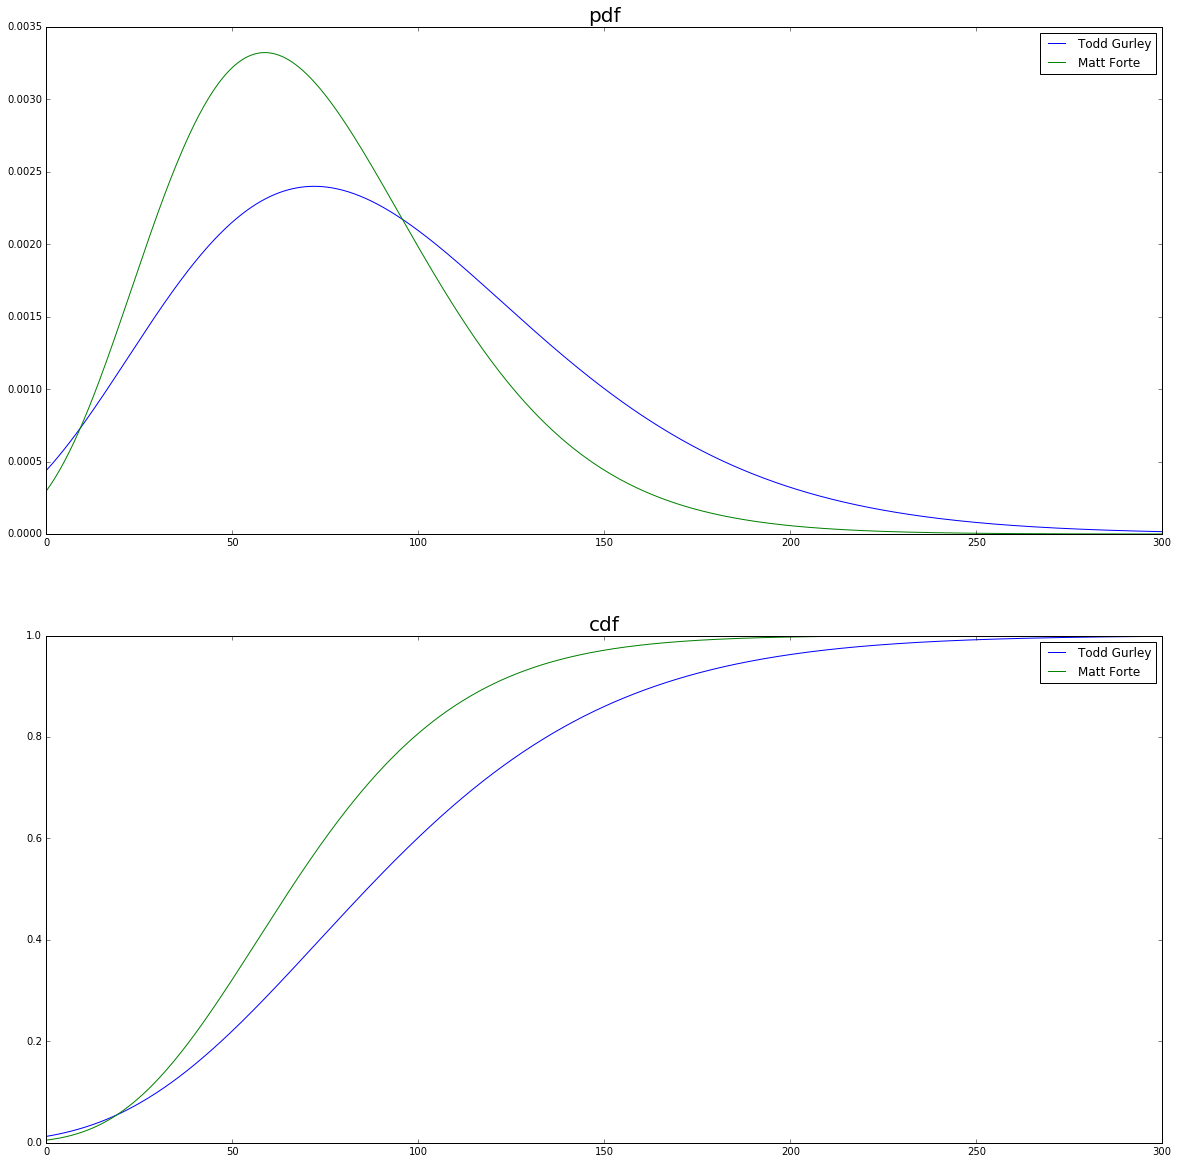

In [90]:
compare_players(distributions[0], distributions[5])

In [108]:
def idx(yards):
    return int(float(yards) * 999/300)

In [109]:
def p(cdf, yds1, yds2):
    return cdf[idx(yds2)] - cdf[idx(yds1)]

In [110]:
p(distributions[5]['cdf'], 100, 150)

0.16381075711407023

In [113]:
probs = []
for i in range(6):
    probs.append({
            player['name']: p(player['cdf'], i*50, 50*(i+1))
            for player in distributions
        })
df = pd.DataFrame(probs)

In [114]:
df

,Adrian Peterson,DeMarco Murray,Eddie Lacy,Jamaal Charles,LeGarrette Blount,LeSean McCoy,Matt Forte,Todd Gurley
0,0.205533,0.288580,0.318542,0.266636,0.566928,0.282368,0.315226,0.206973
1,0.390083,0.394487,0.457758,0.394118,0.289564,0.431694,0.486631,0.382350
2,0.252703,0.205996,0.173119,0.217363,0.097173,0.205644,0.163811,0.257741
3,0.103658,0.074635,0.031862,0.082431,0.030000,0.057739,0.026206,0.102837
4,0.032442,0.021863,0.003677,0.025168,0.008733,0.011783,0.002670,0.029164
5,0.008750,0.005740,0.000319,0.006869,0.002509,0.002008,0.000209,0.006726


In [189]:
data1[36:53]

[136, 51, 128, 40, 73, 64, 146, 87, 9, 74, 61, 30, 0, 167, 135, 131, 115]

In [210]:
start_idx = 36
num_pts = 16
weights = np.linspace(0.1, 1, num_pts)

yds = data1[start_idx:start_idx + num_pts]
yds_norm = [float(x)/sum(yds) for x in yds]
range_yds_norm = max(yds_norm) - min(yds_norm)
print range_yds_norm
yds_wt = [a*b for a,b in zip(yds_norm, weights)]
yds_wt_norm = [float(x)/sum(yds_wt) for x in yds_wt]
range_yds_wt_norm = max(yds_wt_norm) - min(yds_wt_norm)
print range_yds_wt_norm
yds_wt_renorm = [int(x*sum(yds)) for x in yds_wt_norm]

0.125375375375
0.19676520994


In [211]:
print sorted(yds)
print sorted(yds_wt_renorm)

min1 = min([x for x in yds if x > 0])
min2 = min([x for x in yds_wt_renorm if x > 0])

adj_weights = np.linspace(float(min1)/min2, float(max(yds)/max(yds_wt_renorm)), num_pts)
yds2_norm = [float(x)/sum(yds_wt_renorm) for x in yds_wt_renorm]
yds2_wt2 = [a*b for a,b in zip(yds2_norm, adj_weights)]
yds2_wt2_norm = [float(x)/sum(yds2_wt2) for x in yds2_wt2]
yds2_wt2_renorm = [int(x*sum(yds)) for x in yds2_wt2_norm]

print '----'
print sorted(yds)
print sorted(yds2_wt2_renorm)

[0, 9, 30, 40, 51, 61, 64, 73, 74, 87, 128, 131, 135, 136, 146, 167]
[0, 9, 14, 19, 24, 40, 44, 45, 50, 76, 80, 84, 119, 226, 233, 262]
----
[0, 9, 30, 40, 51, 61, 64, 73, 74, 87, 128, 131, 135, 136, 146, 167]
[0, 0, 14, 35, 43, 50, 51, 80, 85, 100, 108, 113, 117, 143, 145, 240]


In [216]:
x = np.linspace(0, 300, 1000)
_, pdf = lombardi.stats.fit_gamma(x, yds)
_, pdf_norm = lombardi.stats.fit_gamma(x, yds2_wt2_renorm)

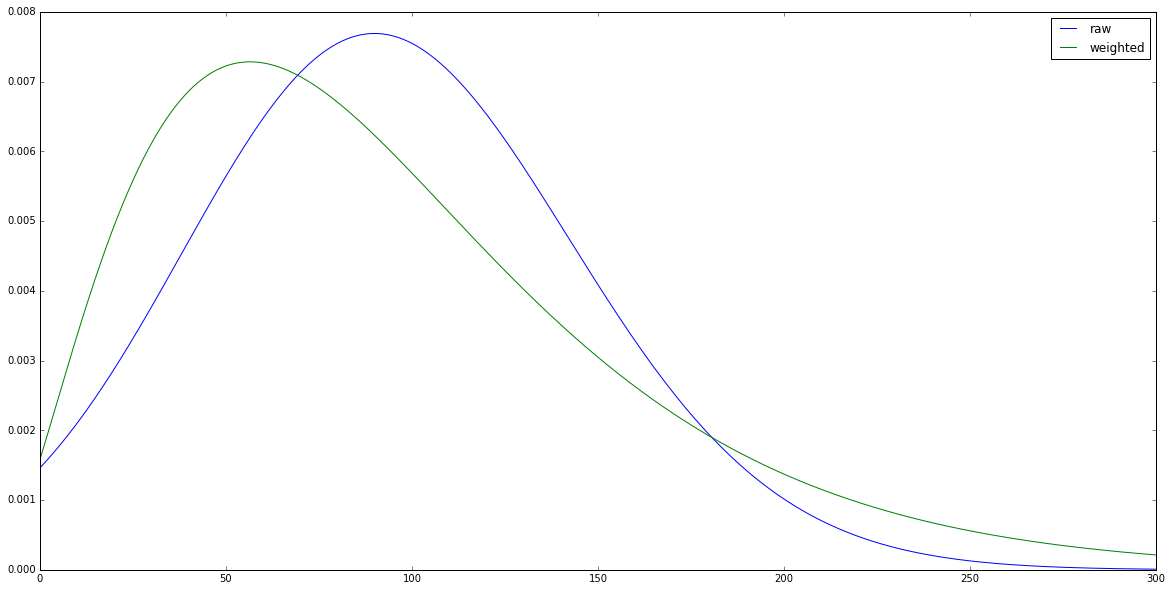

In [217]:
figure = plt.figure(figsize=(20,10))
plt.plot(x, pdf, label='raw')
plt.plot(x, pdf_norm, label='weighted')
plt.legend()

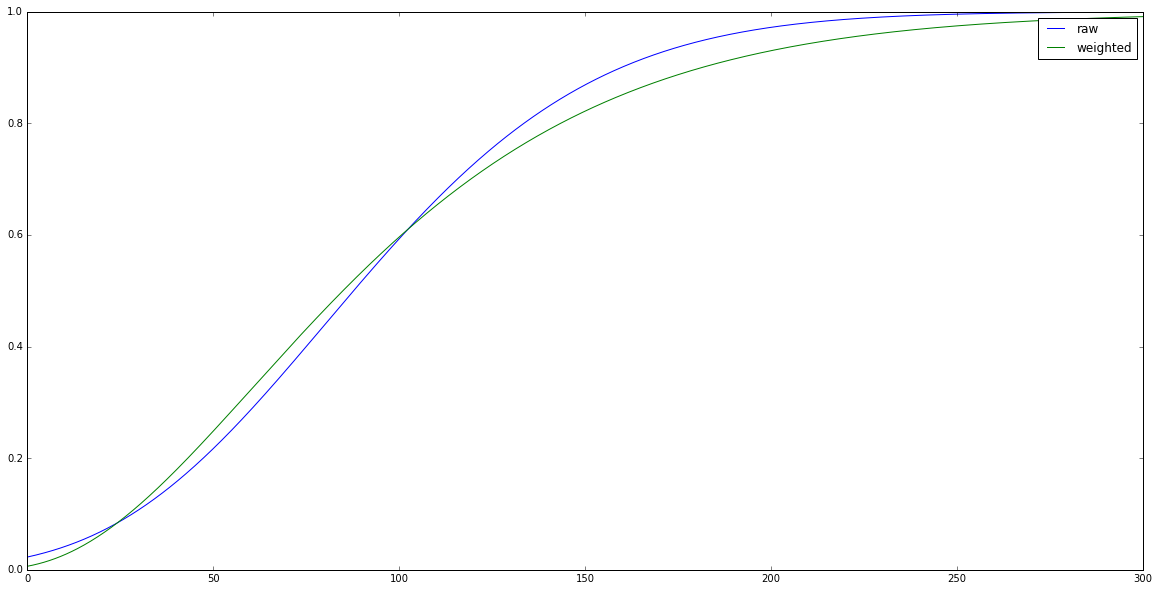

In [219]:
figure = plt.figure(figsize=(20,10))
plt.plot(x, lombardi.stats.cdf(x, yds)[1], label='raw')
plt.plot(x, lombardi.stats.cdf(x, yds2_wt2_renorm)[1], label='weighted')
plt.legend()

16


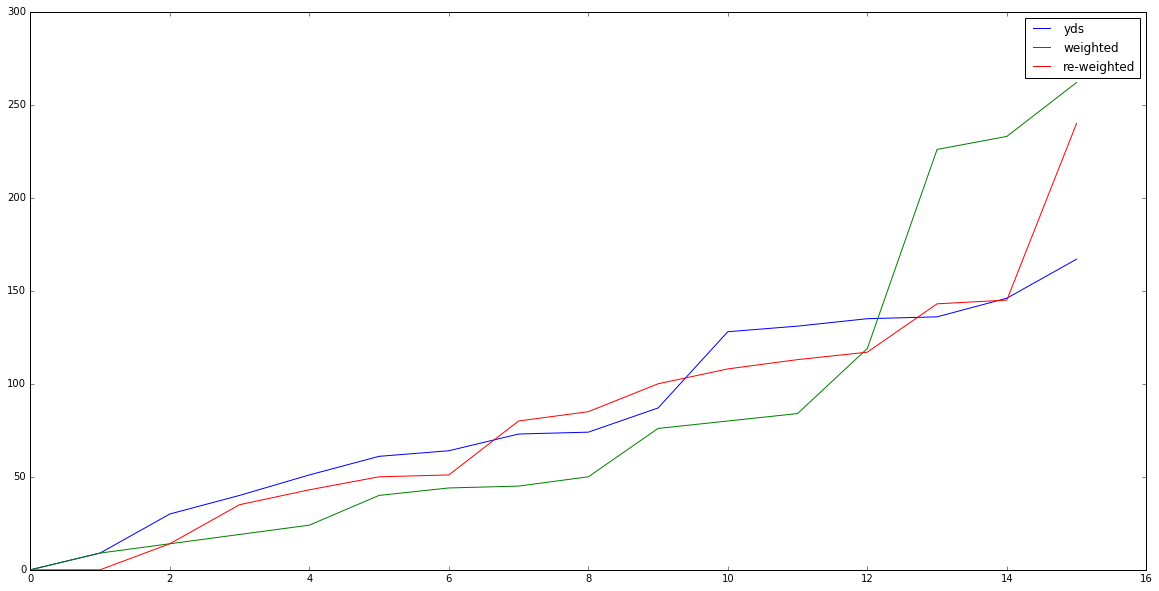

In [214]:
print len(yds2_wt2_renorm)

figure = plt.figure(figsize=(20,10))
plt.plot(range(16), sorted(yds), label='yds')
plt.plot(range(16), sorted(yds_wt_renorm), label='weighted')
plt.plot(range(16), sorted(yds2_wt2_renorm), label='re-weighted')
plt.legend()